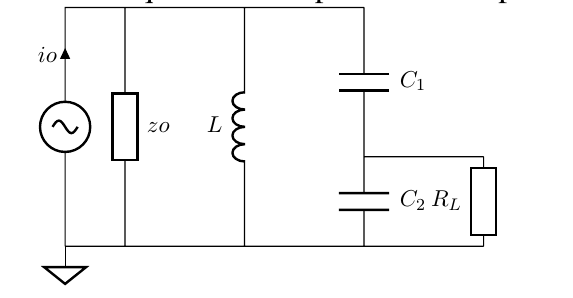

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (10, 10),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 


plt.rcParams.update(params)
from IPython.display import Image

Image(filename= "fig/eje3.png",width=450)

Se desea conectar una carga de $R=100\Omega$ a un transistor. 
La resistencia de salida del transistor es $r_o = 8100\Omega$ y $c_o = 10 pF$ a $f_o = 4 MHz$. Suponga que la fuente de corriente es de $i_o = 10uA $.
Se desea un ancho de banda de $BW = 200KHz$ a $f_o = 4 MHz$.

Asumir que todas las perdías corresponden a el inductor con un $Q_o = 100$.  


1. $Q_c$ y $L$ para máxima transferencia de energía a Qcte a $F_o =4MHz$. (10ptos)
2. $C_1$ y $C_2$ para máxima transferencia de energía a Qcte a $F_o = 4 MHz$. Verifique usando la carta de Smith.(20ptos)
3.  Potencia disponible del transistor,  potencia en la carga y verifique empleando simuladores.(10ptos)




In [3]:
import myplot as myp

In [225]:
# Datos
RL = 50

rg = 910
Qo = 40000 
ig = 10e-6 # A pico
Pdisp =  (ig/2)**2/2*rg

BW  = 4e6 
fo  =  10e6
wo = 2*np.pi*fo


# Calculo la impedancia de la fuente para el modelo paralelo
zg = rg 
print('Pdisp =  {:1.1e} W'.format(Pdisp) )


Pdisp =  1.1e-08 W


In [226]:
Qc =  fo/BW

# 1/Qc = 1/Qo + (wo*L)/Rext
Rext = rg/2

L  = ((1/Qc) - (1/Qo)) * Rext/wo

# inductor serie con perdidas
Xl   = wo*L
rplp  = Qo*Xl

print('Qc =  {:1.1f} '.format(Qc) )
print('L  =  {:1.4f} nHy'.format(L/1e-9) )
print('rpl  =  {:1.4e} ohms'.format(rplp) )
print('PRL =  {:1.3e} W'.format(Pdisp*(1 - (Qc/Qo))**2) )      

Qc =  2.5 
L  =  2896.4389 nHy
rpl  =  7.2795e+06 ohms
PRL =  1.137e-08 W


In [211]:
C =  1/(wo**2 * L)
Cd= C  - cg

# divisor capacitivo
N   = (rg/RL)**(1/2)
Qm2  = rg*wo*Cd
print(Qm2)

Qm1  = (((1+ Qm2**2)/N**2)- 1 )**(1/2)
print(Qm1)

C2  = Qm1/(RL*wo)
C2p = C2*(1 + (1/Qm1**2) )

Cdp = Cd /(1 + (1/Qm2**2) )

C1  =  (Cdp * C2p)/(C2p - Cdp)


print('C1 =  {:1.3f} pF'.format(C1/1e-12) )
print('C2 =  {:1.3f} pF'.format(C2/1e-12) )

5.333333333333333
0.7860194767476296
C1 =  104.480 pF
C2 =  250.198 pF


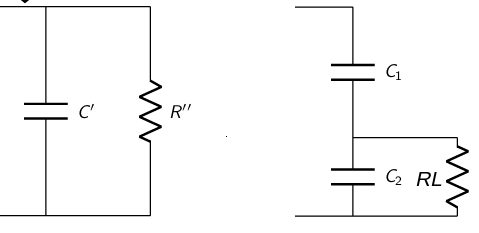

In [212]:
Image(filename= "fig/eje3divC.png",width=450)

## Divisor capacitivo:

Los datos son $C'$, $R''$ y $R_L$.

Buscamos los valores de $C_1$ y $C_2$.

Empezando desde el paralelo de $R_L$ y $C_2$, donde para tener el modelo serie ($R_L'$ y $C_2'$) podemos escribir  $Q_{m1}$ como:
$$ Q_{m1} = R_L \omega C_2 $$ 

Entonces:
$$ R_L' = \frac{R_L}{(1+Q_{m1}^2)}$$ 
$$ X_2' = \frac{X_2}{(1+\frac{1}{Q_{m1}^2})}$$ 
$$ C_2' = C_2(1+\frac{1}{Q_{m1}^2})$$


Al modelo serie de $R_L'$ y $C_2'$ hay que agregar $C_1$ ($C_1$ en serie con $C_2'$) :
$$ C = \frac{C_1C_2'}{C_1+C_2'}$$

Despejando $C_1$:
$$ C_1 = \frac{C_2' C}{C_2' - C}$$



Ahora tenemos como resultado la serie de $C$ con $R_L'$. 

Para tener el modelo serie del paralelo de $R''$ con $C'$, calculamos $Q_{m2}$.

$$ Q_{m2} = R'' \omega C'  $$

$$ R_L''  = R_L'(1+Q_{m2}^2) $$
$$ C'     = C (1+\frac{1}{Q_{m2}^2})$$
$$ C     = \frac{C'}{ (1+\frac{1}{Q_{m2}^2})}$$


Recordando: 
$$ R_L' = \frac{R_L}{(1+Q_{m1}^2)}$$ 


Remplanzando R_L' 
$$ R_L''  = R_L  \frac{(1+Q_{m2}^2) }{(1+Q_{m1}^2)} $$

Dado que $Q_{m1}$ es incognita, despejamos:

$$ (1+Q_{m1}^2) = \frac{R_L}{R_L''}(1+Q_{m2}^2)$$

$$ Q_{m1} = \sqrt[]{\frac{R_L}{R_L''}(1+Q_{m2}^2)-1}$$

Conocido $Q_{m1}$, podemos calcular $C_2$:
$$ C_2 = \frac{Q_{m1}}{R_L \omega} $$ 

Para calcular $C_1$, calculamos $C_2'$ y $C$: 
$$ C_2' = C_2(1+\frac{1}{Q_{m1}^2})$$
$$ C     = \frac{C'}{ (1+\frac{1}{Q_{m2}^2})}$$

Entonces:
$$ C_1 = \frac{C_2' C}{C_2' - C}$$


## Por lo tanto:

Los datos son $C'$, $R''$ y $R_L$.

Buscamos los valores de $C_1$ y $C_2$.

$$ Q_{m2} = R_L'' \omega C'  $$

$$ Q_{m1} = \sqrt[]{\frac{R_L}{R_L''}(1+Q_{m2}^2)-1}$$

$$ C_2 = \frac{Q_{m1}}{R_L \omega} $$ 

$$ C_2' = C_2(1+\frac{1}{Q_{m1}^2})$$

$$ C     = \frac{C'}{ (1+\frac{1}{Q_{m2}^2})}$$

$$ C_1 = \frac{C_2' C}{C_2' - C}$$

### Analizando.

A partir de :

$$ Q_{m1} = \sqrt[]{\frac{R_L}{R_L''}(1+Q_{m2}^2)-1}$$

Podemos llamar $N^2 =\frac{R_L''}{R_L}$, donde $N$ será mayor a 1 ya que  $R_L'' > R_L$.

$$ Q_{m1} = \sqrt[]{\frac{(1+Q_{m2}^2)}{N^2}-1}$$

Si ahora $ Q_{m2} > 10$, entonces: 

$$ Q_{m1} = \sqrt[]{\frac{(Q_{m2}^2)}{N^2}-1}$$

Donde si $ Q_{m1} > 10$, podemos escribir:

$$ Q_{m1} \sim \frac{Q_{m2}}{N}$$



# Procedimiento de cálculo si $Q_{m2} > 10$ 

$$ Q_{m2} = R_L'' \omega C'  $$

$$ N =\sqrt[]{\frac{R_L''}{R_L}} $$

$$ Q_{m1} \sim \frac{Q_{m2}}{N}$$

## Si $Q_{m1} < 10$ entonces: 

Volvemos a calcular $Q_{m1}$: 

$$ Q_{m1} = \sqrt[]{\frac{(1+Q_{m2}^2)}{N^2}-1}$$

$$ C_2 = \frac{Q_{m1}}{R_L \omega} $$ 

$$ C_2' = C_2(1+\frac{1}{Q_{m1}^2})$$

$$ C     = \frac{C'}{ (1+\frac{1}{Q_{m2}^2})}$$

$$ C_1 = \frac{C_2' C}{C_2' - C}$$


## Si $Q_{m1} > 10$ entonces: 


$$ C_2 = \frac{Q_{m1}}{R_L \omega} $$ 

Siendo $Q_{m1}$:

$$ Q_{m1} \sim \frac{Q_{m2}}{N}$$

$$ C_2 \sim \frac{Q_{m2}}{N R_L \omega} $$ 

$$ C_2 \sim \frac{R_L'' \omega C'}{N R_L \omega} $$ 

$$ C_2 \sim \frac{N^2 \omega C'}{N \omega} $$ 

$$ C_2 \sim N C' $$ 

Y para calcular $C_1$:

$$ C_1 = \frac{C_2' C'}{C_2' - C'}$$

$$ C_2' \sim C_2 $$ 

$$ C_1 = \frac{C_2 C'}{C_2 - C'}$$

$$ C_1 = \frac{N C' }{N  - 1}$$


# Resumen!:

$$ Q_{m2} = R_L'' \omega C'  $$

# si $Q_{m2} > 10$ 

$$ N =\sqrt[]{\frac{R_L''}{R_L}} $$

$$ Q_{m1} \sim \frac{Q_{m2}}{N}$$


## Si $Q_{m1} < 10$ entonces: 

Volvemos a calcular $Q_{m1}$: 

$$ Q_{m1} = \sqrt[]{\frac{(1+Q_{m2}^2)}{N^2}-1}$$

$$ C_2 = \frac{Q_{m1}}{R_L \omega} $$ 

$$ C_2' = C_2(1+\frac{1}{Q_{m1}^2})$$

$$ C     = \frac{C'}{ (1+\frac{1}{Q_{m2}^2})}$$

$$ C_1 = \frac{C_2' C}{C_2' - C}$$


## Si $Q_{m1} > 10$ entonces: 


$$ C_2 = N C' $$ 

$$ C_1 = \frac{N C' }{N  - 1}$$


In [213]:
# Ahora calculando en la hoja de calculo 
# Defino el array de frecuencia
f =  np.arange(fo-BW*2,fo+BW*2,fo/1000)
# armo el array de w
w = 2*np.pi*f

# Ahora comparamos con el circuito usando el capacitor sin perdidas
## DATOS
print('Los datos empleados para los calculos:')
print('.param RL  =  {:1.1f} '.format(RL) )
print('.param C1 =  {:1.3e} '.format(C1) )
print('.param C2 =  {:1.3e} '.format(C2) )


print('.param L  =  {:1.4e} '.format(L) )
print('.param rp  =  {:1.2f} '.format(rplp) )

print('.param rg  =  {:1.2f} '.format(rg) )
print('.param cg  =  {:1.2e} '.format(cg) )

print('.param ig  =  {:1.2e} '.format(ig) )
print('')


# Impedancia de carga 
ZL   = RL 

# Impedancia C1
Xc1  = -1/(w*C1)
Zc1  =  1j*Xc1
# Impedancia C2
Xc2  = -1/(w*C2)
Zc2  = 1j*Xc2

Zrc = Zc2*ZL / (Zc2+ ZL)
Zc  = Zc1 + Zrc
Yc  = 1/Zc
# inductor serie con perdidas
Xl   = w*L
rpl  = Qo*Xl
Yl   = (1/rpl) + 1/(1j*Xl)

Zin =  1/ (Yc+ Yl)




Los datos empleados para los calculos:
.param RL  =  50.0 
.param C1 =  1.045e-10 
.param C2 =  2.502e-10 
.param L  =  2.7156e-06 
.param rp  =  6825.00 
.param rg  =  910.00 
.param cg  =  0.00e+00 
.param ig  =  1.00e-05 



frecuencia central
fo =  1.041e+07 MHz
Ancho de banda:
Qc  =  2.258e+00 
BW  =  4.610 MHz

Potenicia:
PRL  =  9.958e-09 W (eff)
PRL  =  -5.00e+01 dBm (eff)


/home/aalmela/scm/git/utn/electronicaaplicada3/2_Circuitos_de_adaptacion/2_Ejercicios/3_transformador/myplot.py:54: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=' ',xy=xymin, xycoords='data',xytext=xymax,textcoords='data',arrowprops=dict(arrowstyle="<->"))
/home/aalmela/scm/git/utn/electronicaaplicada3/2_Circuitos_de_adaptacion/2_Ejercicios/3_transformador/myplot.py:55: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='BW',xy=xytext, xycoords='data',fontsize=12.0,textcoords='data',ha='center')


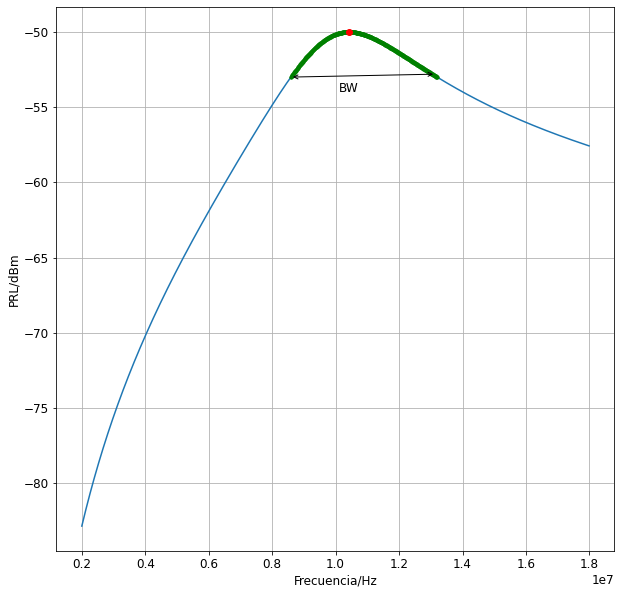

In [214]:
Zg  = rg 

# Impedancia total incluida la impedancia del generador
Z =  Zg*Zin / (Zg+ Zin)

# Calculo de la potenicia de RL
v   = ig * Z
ic  = v / Zc
vrl = ic*Zrc
irl = vrl/ZL
Prl = np.abs(irl*vrl)/2 # potenica eficaz

myp.imprimePRL(f, Prl)


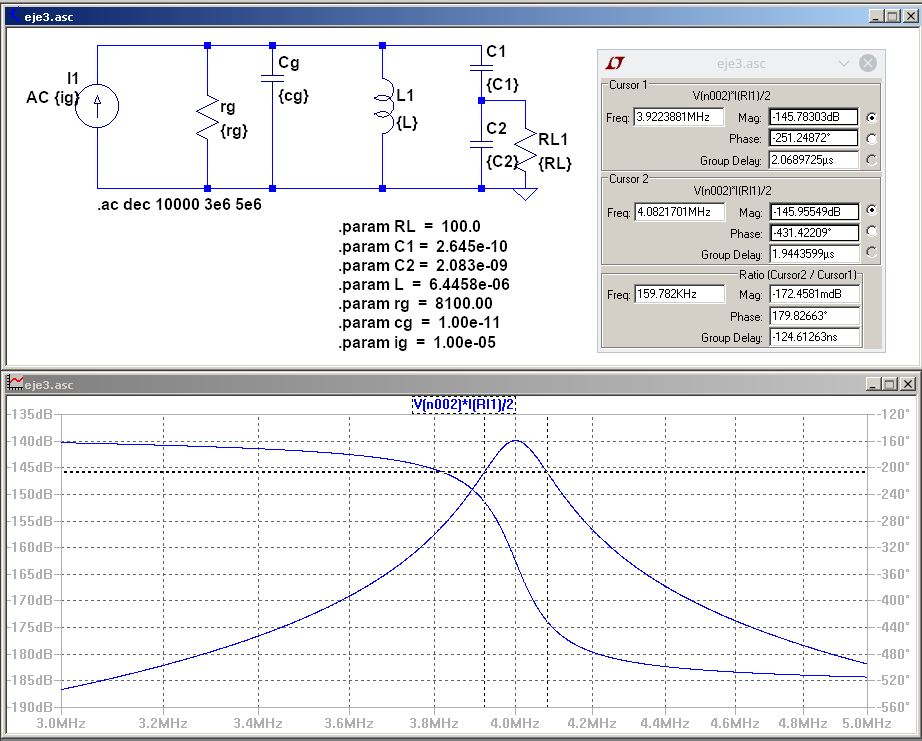

In [14]:
Image(filename= "fig/eje3sim.png",width=850)

In [223]:
a =  200-10j

In [224]:
print(1/a)

(0.004987531172069825+0.0002493765586034913j)
